# Importing useful libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


# Explorator data analysis


In [2]:
data= pd.read_csv('weight-height.csv')

In [3]:
data.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [5]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

# Data Visualisation


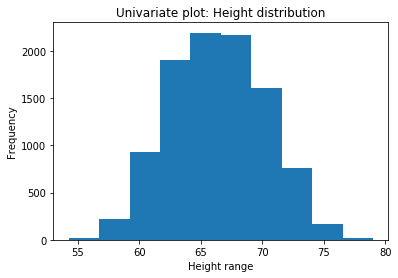

In [6]:
plt.hist(data.Height)
plt.title("Univariate plot: Height distribution")
plt.xlabel("Height range")
plt.ylabel("Frequency")
plt.style.use('ggplot')
plt.show()


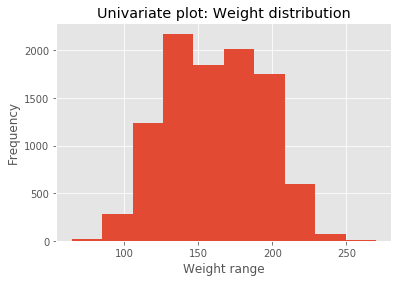

In [7]:
plt.hist(data.Weight)
plt.title("Univariate plot: Weight distribution")
plt.style.use('seaborn-dark-palette')
plt.xlabel("Weight range")
plt.ylabel("Frequency")
plt.style.use('ggplot')
plt.show()

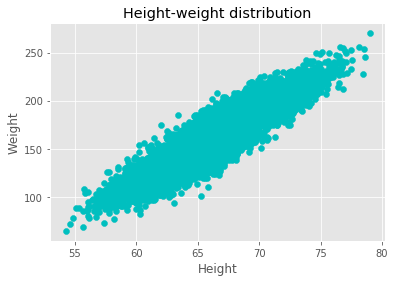

In [8]:
# Multivariate visualistion

plt.scatter(x=data['Height'],y=data['Weight'],color='c')
plt.title('Height-weight distribution')
plt.style.use('seaborn-dark-palette')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.style.use('ggplot')
plt.show()

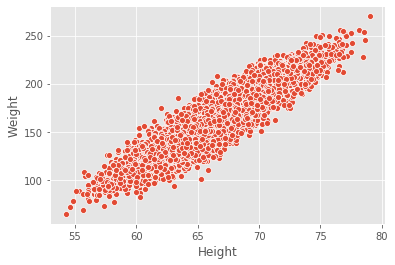

In [9]:
# Using seaborn to plot the scatter

sns.scatterplot(x="Height", y='Weight', data=data)

Looking at the plot above a linear relationship is clearly visible. We will thus be using a linear regression model for prediction

# Predicting weight based on height



In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Splitting the data into input and prediction variable

In [12]:
# X = data.iloc[:,1:2].values
# y = data.iloc[:,2].values

In [13]:
X = data.drop(columns=['Weight','Gender'])
y = data['Weight']

In [14]:
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Weight, Length: 10000, dtype: float64

# Splitting the data into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [17]:
X_train

,Height
9276,64.604267
7541,69.169353
6428,63.276960
8098,62.069851
9771,61.345725
...,...
5372,67.803789
28,67.421242
826,66.184108
3735,68.908950


In [18]:
X_train

,Height
9276,64.604267
7541,69.169353
6428,63.276960
8098,62.069851
9771,61.345725
...,...
5372,67.803789
28,67.421242
826,66.184108
3735,68.908950


In [19]:
X_train.shape

(7000, 1)

In [20]:
y_train.shape

(7000,)

In [21]:
X_test.shape

(3000, 1)

In [22]:
y_test.shape

(3000,)

# Building the model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regr = LinearRegression()

In [25]:
model_fit=regr.fit(X_train,y_train)

In [26]:
model_predict = regr.predict(X_test)

In [27]:
model_predict

array([163.3254169 , 172.4561169 , 141.93545547, ..., 183.17868191,
       151.35818679, 140.9103195 ])

In [28]:
predict_df = pd.DataFrame({'actual':y_test,'prediction':model_predict})


In [29]:
predict_df

,actual,prediction
757,146.230805,163.325417
1003,180.004548,172.456117
8089,121.095961,141.935455
2967,187.779075,174.411848
5011,106.233687,126.121588
...,...,...
5442,116.602306,130.799893
1114,202.039446,197.369098
1227,201.303696,183.178682
7764,135.605516,151.358187


# Visualizing the prediction

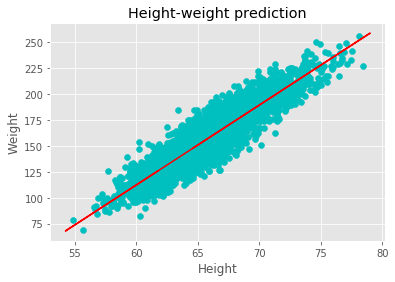

In [30]:
plt.scatter(X_test,y_test,color='c')
plt.plot(X_train,regr.predict(X_train),color='r')
plt.title('Height-weight prediction')
plt.style.use('seaborn-dark-palette')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.style.use('ggplot')
plt.show()

# Scoring the prediction

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(regr,X_test,y_test,cv=5).mean()

0.8514019867188323

In [33]:
from sklearn.metrics import r2_score

In [34]:
print(f"Model Accuracy is: {regr.score(X_test, y_test)}")

Model Accuracy is: 0.8518184505555159


In [35]:
r2_score(y_test, model_predict)

0.8518184505555159

# Classification algorithm